In [2]:
import tellurium as te

# Testing T2D models from BioModels

Questions:
- what are the time scales of the models? What is one "tick" of time in each?
- can we compare parameters and outputs in the different models?
- can we map inputs/outputs/variables/parameters of the model onto nodes in a knowledge graph? (yes, because some of them have identifiers)
- can we develop a tool to more easily edit/modify the models based on certain variables? i.e., given patient data from EHRs/Arivale, map it onto the model?

## Koenig 2012 - Hepatic Glucose Metabolism in Type 2 Diabetes

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3481299/ - Kinetic Modeling of Human Hepatic Glucose Metabolism in Type 2 Diabetes Mellitus Predicts Higher Risk of Hypoglycemic Events in Rigorous Insulin Therapy

Notes:

In [3]:
# 1. koenig2012
# https://www.ebi.ac.uk/biomodels/MODEL1209260000
koenig2012 = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/MODEL1209260000.3?filename=MODEL1209260000_url.xml')

In [7]:
koenig2012.resetAll()
print(koenig2012.getAntimony())

// Created by libAntimony v2.13.2
model *Koenig2012_HepaticGlucoseMetabolism()

  // Compartments and Species:
  compartment cyto, blood, mito, mm, pm;
  species atp in cyto, adp in cyto, amp in cyto, utp in cyto, udp in cyto;
  species gtp in cyto, gdp in cyto, nad in cyto, nadh in cyto, p in cyto;
  species pp in cyto, h2o in cyto, co2 in cyto, h in cyto, glc1p in cyto;
  species udpglc in cyto, glc in cyto, glyglc in cyto, fru6p in cyto, glc6p in cyto;
  species fru26bp in cyto, fru16bp in cyto, dhap in cyto, grap in cyto, pg3 in cyto;
  species bpg13 in cyto, pep in cyto, pg2 in cyto, oaa in cyto, pyr in cyto;
  species glc_blood in blood, lac in cyto, p_mito in mito, oaa_mito in mito;
  species lac_blood in blood, co2_mito in mito, pyr_mito in mito, cit_mito in mito;
  species pep_mito in mito, acoa_mito in mito, gtp_mito in mito, gdp_mito in mito;
  species atp_mito in mito, adp_mito in mito, nad_mito in mito, h_mito in mito;
  species coa_mito in mito, nadh_mito in mito, epineph

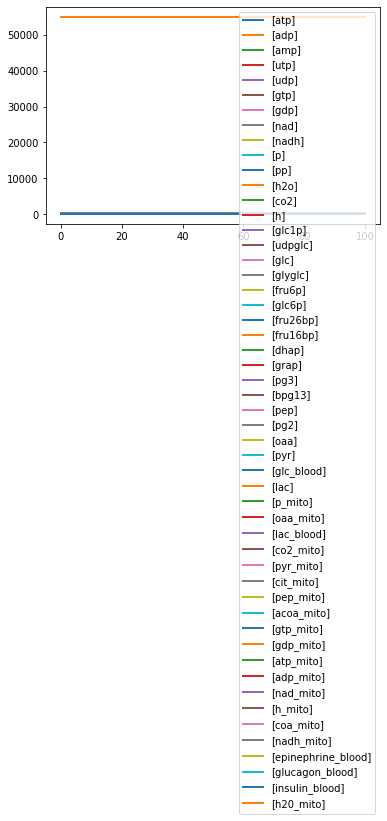

In [5]:
r1 = koenig2012.simulate(0, 100)
koenig2012.plot(r1)

## Pandit 2003

https://www.ebi.ac.uk/biomodels/MODEL8685104549

Going to skip this model as it deals with type 1 diabetes.

## Sen 2020

https://www.ebi.ac.uk/biomodels/MODEL1905270001

Also a type 1 diabetes model

## Bordbar 2011 - A multi-tissue type genome-scale metabolic network for analysis of whole-body systems physiology

https://www.ebi.ac.uk/biomodels/MODEL1111070000, https://www.ebi.ac.uk/biomodels/MODEL1111070001, https://www.ebi.ac.uk/biomodels/MODEL1111070002, https://www.ebi.ac.uk/biomodels/MODEL1111070003

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3219569/ - A multi-tissue type genome-scale metabolic network for analysis of whole-body systems physiology

The first three are tissue/cell-specific models for adipocytes, hepatocytes, myocytes. The last is a multi-tissue model that integrates the three cell types. It's a relatively large model that I don't think I can fully understand term-by-term.

"global human metabolic network" - "Recon 1" is a previously described model (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1794290/) for human metabolomics, with "1,496 ORFs, 2,004 proteins, 2,766 metabolites, and 3,311 metabolic and transport reactions."

"High-throughput data was integrated with the network to determine differential metabolic activity between obese and type II obese gastric bypass patients in a whole-body context."

Could be useful? idk

In [8]:
bordbar2011 = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/MODEL1111070003.2?filename=MODEL1111070003_url.xml')

In [10]:
bordbar2011.resetAll()
bordbar2011_antimony = bordbar2011.getAntimony()

In [11]:
with open('bordbar2011_antimony.txt', 'w') as f:
    f.write(bordbar2011_antimony)

In [13]:
r = bordbar2011.simulate(0, 100)
# unfortunately, plotting it seems to put everything at zero. I don't know what's up.

In [ ]:
# get variables?

## Topp 2000 - A model of beta-cell mass, insulin, and glucose kinetics: pathways to diabetes 

https://www.ebi.ac.uk/biomodels/BIOMD0000000341

Ref: https://pubmed.ncbi.nlm.nih.gov/11013117/ -  A model of beta-cell mass, insulin, and glucose kinetics: pathways to diabetes 

I've already implemented this model, but I didn't know it was a curated model on biomodels.

In [23]:
topp2000 = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000341.2?filename=BIOMD0000000341_url.xml')

In [24]:
topp2000.resetAll()
print(topp2000.getAntimony())

// Created by libAntimony v2.13.2
model *Topp2000_BetaCellMass_Diabetes()

  // Compartments and Species:
  compartment cell;
  species $G in cell, $I in cell, $B in cell;

  // Rate Rules:
  G' = R0 - (Eg0 + si*I)*G;
  I' = B*sigma*G^2/(alpha + G^2) - k*I;
  B' = (-d0 + r1*G - r2*G^2)*B;

  // Species initializations:
  G = 250;
  I = 2.8;
  B = 37;

  // Compartment initializations:
  cell = 1;

  // Variable initializations:
  R0 = 864;
  Eg0 = 1.44;
  si = 0.72;
  sigma = 43.2;
  alpha = 20000;
  k = 432;
  d0 = 0.06;
  r1 = 0.00084;
  r2 = 2.4e-06;

  // Other declarations:
  const cell, R0, Eg0, si, sigma, alpha, k, d0, r1, r2;

  // Display Names:
  G is "glucose";
  I is "insulin";
  B is "Mass";

  // SBO terms:
  G.sboTerm = 247
  R0.sboTerm = 393
  Eg0.sboTerm = 9
  si.sboTerm = 9
  I.sboTerm = 252
  B.sboTerm = 240
  sigma.sboTerm = 9
  alpha.sboTerm = 9
  k.sboTerm = 9
  d0.sboTerm = 179
  r1.sboTerm = 9
  r2.sboTerm = 9

  // CV terms:
  G hypernym "http://identifiers.org

In [ ]:
# TODO: see if we can get variables by their identifiers or something?

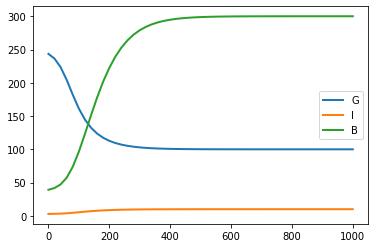

In [26]:
r = topp2000.simulate(0, 1000)
topp2000.plot(r)

The plots basically look the same as the plots we've seen before with this model (see topp_2000.ipynb), going to the "physiological steady state".

## Alvehag 2006

https://www.ebi.ac.uk/biomodels/MODEL1112110000 - IVGTT, https://www.ebi.ac.uk/biomodels/MODEL1112110001 - OGTT

These are models for the intravenous glucose tolerance test and oral glucose tolerance test.

Ref: https://ieeexplore.ieee.org/document/4177084 - The Feedback Control of Glucose: On the road to type II diabetes

In [28]:
alvehag2006_ivgtt = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/MODEL1112110000.2?filename=MODEL1112110000_url.xml')

In [30]:
alvehag2006_ivgtt.resetAll()
print(alvehag2006_ivgtt.getAntimony())

// Created by libAntimony v2.13.2
model *Alvehag2006_IVGTT_GlucoseModel_A()

  // Compartments and Species:
  compartment compartment1;
  species $G_BV in compartment1, $G_BI in compartment1, $G_H in compartment1;
  species $G_L in compartment1, $G_K in compartment1, $G_PV in compartment1;
  species $G_G in compartment1, $G_PN in compartment1, $G_PI in compartment1;
  species $M_I_HGP in compartment1, $f2 in compartment1, $M_I_HGU in compartment1;
  species $I_B in compartment1, $I_H in compartment1, $I_L in compartment1;
  species $I_K in compartment1, $I_PV in compartment1, $I_G in compartment1;
  species $I_PN in compartment1, $I_PI in compartment1, $P in compartment1;
  species $I in compartment1, $Q in compartment1, $Gamma in compartment1;
  species $R_OGA in compartment1, $GIP_body in compartment1, $G_gut in compartment1;
  species $GIP_gut in compartment1, $r_OGA in compartment1;

  // Assignment Rules:
  G_H_0 := G_PV_0 + r_B_PGU/Q_G_P;
  r_IVG := piecewise(0, (time >= (IVT + I

Traceback (most recent call last):
  File "/home/yjzhang/.pyenv/versions/3.10.5/lib/python3.10/site-packages/matplotlib/cbook/__init__.py", line 283, in process
    for cid, ref in list(self.callbacks.get(s, {}).items()):
RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.
Exception ignored in: 'PyDataMem_UserFREE'
Traceback (most recent call last):
  File "/home/yjzhang/.pyenv/versions/3.10.5/lib/python3.10/site-packages/matplotlib/cbook/__init__.py", line 283, in process
    for cid, ref in list(self.callbacks.get(s, {}).items()):
ValueError: PyCapsule_GetPointer called with invalid PyCapsule object


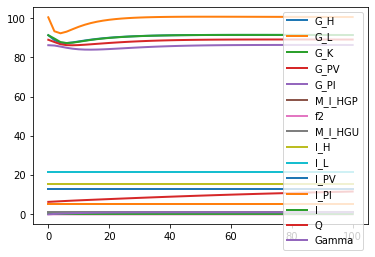

In [31]:
r = alvehag2006_ivgtt.simulate(0, 100)
alvehag2006_ivgtt.plot(r)

In [6]:
alvehag2006_ogtt = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/MODEL1112110001.2?filename=MODEL1112110001_url.xml')

In [7]:
alvehag2006_ogtt.resetAll()
print(alvehag2006_ogtt.getAntimony())

// Created by libAntimony v2.13.2
model *Alvehag2006_OGTT_GlucoseModel_B()

  // Compartments and Species:
  compartment compartment1;
  species $G_BV in compartment1, $G_H in compartment1, $G_BI in compartment1;
  species $G_L in compartment1, $G_K in compartment1, $G_PV in compartment1;
  species $G_G in compartment1, $r_OGA in compartment1, $G_PN in compartment1;
  species $G_PI in compartment1, $M_I_HGP in compartment1, $f2 in compartment1;
  species $M_I_HGU in compartment1, $I_B in compartment1, $I_H in compartment1;
  species $I_L in compartment1, $I_K in compartment1, $I_PV in compartment1;
  species $I_G in compartment1, $I_PN in compartment1, $I_PI in compartment1;
  species $P in compartment1, $I in compartment1, $Q in compartment1, $Gamma in compartment1;
  species $R_OGA in compartment1, $GIP_body in compartment1, $GIP_gut in compartment1;
  species $G_gut in compartment1;

  // Assignment Rules:
  G_BV_0 := G_H_0 - r_BGU/Q_G_B;
  G_BI_0 := G_BV_0 - r_BGU*T_B/V_BI;
  G_H_0

Traceback (most recent call last):
  File "/home/yjzhang/.pyenv/versions/3.10.5/lib/python3.10/site-packages/matplotlib/artist.py", line 1055, in update
    with cbook._setattr_cm(self, eventson=False):
RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.
Exception ignored in: 'PyDataMem_UserFREE'
Traceback (most recent call last):
  File "/home/yjzhang/.pyenv/versions/3.10.5/lib/python3.10/site-packages/matplotlib/artist.py", line 1055, in update
    with cbook._setattr_cm(self, eventson=False):
ValueError: PyCapsule_GetPointer called with invalid PyCapsule object
Traceback (most recent call last):
  File "/home/yjzhang/.pyenv/versions/3.10.5/lib/python3.10/site-packages/matpl

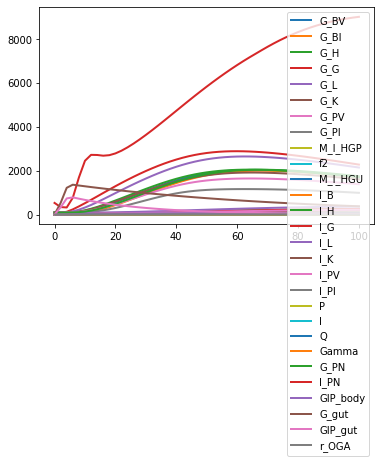

In [8]:
alvehag2006_ogtt.resetAll()
r = alvehag2006_ogtt.simulate(0, 100)
alvehag2006_ogtt.plot(r)

## Fridlyand 2010

https://www.ebi.ac.uk/biomodels/BIOMD0000000348 (general model), https://www.ebi.ac.uk/biomodels/BIOMD0000000349 (also includes independent [Ca2+]c oscillations).

Ref: https://tbiomed.biomedcentral.com/articles/10.1186/1742-4682-7-15 -  Glucose sensing in the pancreatic beta cell: a computational systems analysis. 

This is a model of pancreatic beta cells.

In [9]:
fridlyand2010 = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000348.2?filename=BIOMD0000000348_url.xml')

In [10]:
fridlyand2010.resetAll()
print(fridlyand2010.getAntimony())

// Created by libAntimony v2.13.2
model *Fridlyand2010_GlucoseSensitivity_A()

  // Compartments and Species:
  compartment compartment_;
  species $G3P in compartment_, $PYR in compartment_, $ATP in compartment_;
  species $NADHm in compartment_, $NADHc in compartment_, $Vm in compartment_;
  species $Cam in compartment_;

  // Assignment Rules:
  JGlu := Vmglu*Glu^hgl*ATP*(1/(Kmgl^hgl + Glu^hgl))*(1/(KmATP + ATP));
  Jgpd := Vmgpd*G3P*NADc*(1/(G3P + Kmg3p))*(1/(KgNc + NADc*(1/NADHc)))*(1/NADHc);
  JPYR := Vmpdh*FPNAD*FPCa*FPYR;
  JLDH := Vmldh*FLNADc*PYR*(1/(KmLD + PYR));
  Cac := CaR + kACa*(ATP*(1/ADP))^hCa*(1/(KAD^hCa + (ATP*(1/ADP))^hCa));
  Jph := Vmph*AD*AT*ACa;
  Jhres := Vme*FTe*FDe;
  Jtnadh := Tnadh*FNADc*NADm*(1/(KTNm + NADm*(1/NADHm)))*(1/NADHm);
  Jhl := (Plb + Plr)*exp(klp*Vm);
  Juni := PCa*ZCa*Vm*(am*Cam*exp(-(Vm*ZCa*(1/Tv))) + -(ai*Cac))*(1/Tv)*(1/(-1 + exp(-(Vm*ZCa*(1/Tv)))));
  JNCa := Vmnc*(exp(0.5*Vm*Ni^3*Cam*(1/(Tv*KNaj^3*KCaj))) + -exp(-(0.5*Vm*Nam^3*Cac*(1/(Tv

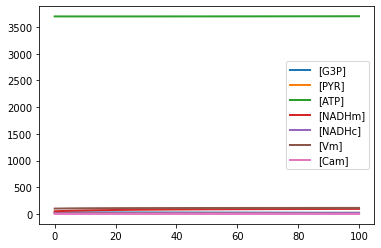

In [11]:
fridlyand2010.resetAll()
r = fridlyand2010.simulate(0, 100)
fridlyand2010.plot(r)

## ChowHall2008 - The dynamics of human weight change

https://www.ebi.ac.uk/biomodels/BIOMD0000000901

Ref: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000045 - The dynamics of human weight change

This is a model for long-term human weight change - a two-compartment macronutrient model.

In [12]:
chow2008 = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000901.6?filename=ChowHall2008+-+Dynamics+of+Human+Weight+Change.xml')

In [13]:
chow2008.resetAll()
print(chow2008.getAntimony())

// Created by libAntimony v2.13.2
model *ChowHall2008_Dynamics_of_Human_Weight_Change_1()

  // Compartments and Species:
  compartment Body;
  species $Fat_Mass in Body, $Lean_Mass in Body, $Body_Mass in Body;

  // Assignment Rules:
  p___Ratio := 1/(1 + alpha);
  Energy_Expenditure_Rate := 0.14*Lean_Mass + 0.05*Fat_Mass + 1.55;
  Psy := 0.05*(Fat_Mass - 0.4*exp(Lean_Mass/10.4))/Fat_Mass;
  Body_Mass := Fat_Mass + Lean_Mass;
  alpha := (rho_F/rho_L)*(Fat_Mass/10.4);

  // Rate Rules:
  Fat_Mass' = ((1 - p___Ratio)*(Intake_Rate - Energy_Expenditure_Rate) - Psy)/rho_F;
  Lean_Mass' = (p___Ratio*(Intake_Rate - Energy_Expenditure_Rate) + Psy)/rho_L;

  // Events:
  Fat_Removal: at time >= 100, t0=false, persistent=false, fromTrigger=false: Fat_Mass = Fat_Mass - 10;

  // Species initializations:
  Fat_Mass = 50;
  Fat_Mass has substance_per_volume;
  Lean_Mass = 50;
  Lean_Mass has substance_per_volume;
  Body_Mass has substance_per_volume;

  // Compartment initializations:
  Body = 1;


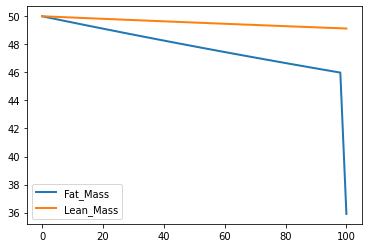

In [14]:
r = chow2008.simulate(0, 100)
chow2008.plot(r)

## Brännmark 2013 - Insulin signalling in human adipocytes (diabetic condition)

https://www.ebi.ac.uk/biomodels/BIOMD0000000449

Ref: https://www.jbc.org/article/S0021-9258(20)67348-3/fulltext

## Karlstaedt 2012 - CardioNet, A Human Metabolic Network

https://www.ebi.ac.uk/biomodels/MODEL1212040000

Ref: https://bmcsystbiol.biomedcentral.com/articles/10.1186/1752-0509-6-114

## Tolic 2000 - Insulin Glucose Feedback

https://www.ebi.ac.uk/biomodels/BIOMD0000000372

Ref: https://pubmed.ncbi.nlm.nih.gov/11082306/

## Palmer 2014 - Effects of IL-1b blocking therapies

https://www.ebi.ac.uk/biomodels/BIOMD0000000620
https://www.ebi.ac.uk/biomodels/BIOMD0000000621

Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4076803/

In [3]:
palmer2014_disease = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000620.2?filename=BIOMD0000000620_url.xml')